In [1]:
#Notes: Regression problems can be solved using specific estimators within TF

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

/home/clemente/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
noise

array([ 0.37480821, -0.93639943, -0.81732285, ...,  0.8354942 ,
       -1.57854722,  0.6959617 ])

In [6]:
# model y = m*x + b; b = 5

In [7]:
# This is the true model that will generate the y
y_true = (0.5 * x_data) + 5 + noise

In [8]:
#### Generating linearly dependent data

In [9]:
x_df = pd.DataFrame(data = x_data, columns=['X Data'])
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [10]:
y_df.head()

,Y
0,5.374808
1,4.063606
2,4.182687
3,5.564611
4,6.445799


In [11]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [12]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [13]:
my_data.head()

,X Data,Y
0,0.00000,5.374808
1,0.00001,4.063606
2,0.00002,4.182687
3,0.00003,5.564611
4,0.00004,6.445799


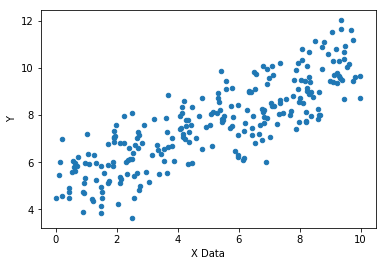

In [14]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y = 'Y')

### Model Preparation

In [15]:
# Preparing batch to be fed
batch_size = 8

In [16]:
#Initializing two random variables
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [17]:
#Creating input and output placeholders
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [18]:
#Defining model
y_model = m*xph + b

In [19]:
#Creating loss function and optimizer
loss = tf.reduce_sum(tf.square(yph - y_model))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
#Defining the training
train = optimizer.minimize(loss)

In [20]:
# TF variable initialization
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    
    sess.run(init) # Starting the session
    
    batches = 1000 # 1000 will be enough
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size = batch_size) # generating random numbers
        
        #defining the feed dictionary and using the random numbers as indexes to draw from the x_data array
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])

In [22]:
rand_ind = np.random.randint(len(x_data), size = batch_size) # generating random numbers

In [23]:
rand_ind

array([633669, 593716, 962523, 769660, 597131, 373794, 603149, 888804])

In [27]:
model_m

0.53649545

In [29]:
model_b

4.925113

In [30]:
y_hat = x_data*model_m + model_b

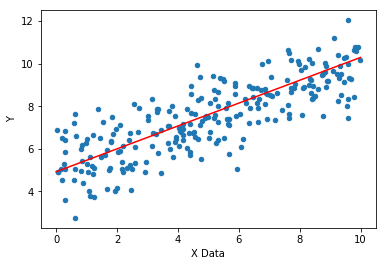

In [31]:
my_data.sample(250).plot(kind='scatter', x = 'X Data', y= "Y")
plt.plot(x_data, y_hat, 'r')